<a href="https://colab.research.google.com/github/MarianaCM004/Analitica-de-Negocios/blob/main/Reto_4_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RETO PARCIAL

Planteamiento del ejercicio:

#####APLICACIÓN DE MODELO GAUSIANO

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Las librerias para el modelo son:
from sklearn.cluster import KMeans #metodo de clusterizacion k mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB #la funcion exponencial de VP=Exp (-1/2((x-4)/devisacion estandar)^2) que necesitamos es una funcion gausiana, por eso lo importamos.
from sklearn.tree import DecisionTreeClassifier #Para crear el arbol de decisión

In [ ]:
data = '/content/4. BD1_Longitudinal Survey_L_Int.xlsx'

XDBB = pd.read_excel(data, sheet_name=0) #XDB=XDATABASE
#PARA EJECUTAR SOLO UNA PARTE DEL CODIGO, SELECCIONAR EL NOMBRE DE LA VARIABLE Y PRESIONAR Ctrl + Shift + Enter
#XDB ES SOLO LA TABLA DE EXCEL


#Seleccionamos las variables de trabajo
XDB=XDBB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'HealthPlan', 'Income']]
XDB.dropna(inplace=True)

XD = XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']] #Vector donde invocamos variables que necesitamos

YD = XDB[['HealthPlan']] #Vector de variable a analizar

<ipython-input-68-7b68342c9127>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB.dropna(inplace=True)


In [ ]:
mnb = GaussianNB () #mnb=model naive bayes
mnb.fit(XD, YD)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
ct=mnb.class_count_
print ("El total de los datos es:\n", len(XD)) #Contamos el total de los datos
print ("Como estan separados los datos\n", ct) #Separamos los datos en 0 y 1. 0 siendo NO y 1 siendo SÍ

conteo = YD.value_counts() #Calculamos el porcentaje al que corresponde 0 y 1 respecto al total de datos
porcentaje_categorias = (conteo/len(XD))*100
print(porcentaje_categorias)

El total de los datos es:
 5963
Como estan separados los datos
 [ 853. 5110.]
HealthPlan
1.0           85.69512
0.0           14.30488
Name: count, dtype: float64


In [ ]:
#Se obtiene la info crucial de cada categoria con highway como variable dependiente

u=mnb.theta_
print("La media de cada categoria es:\n", u)

std=mnb.var_ #esto e svarianza, que es la sdt elevada al cuadrado
std=np.sqrt(std) #esto es la desviacion estandar
print("La desviación estandar de cada categoria es:\n", std)

#Se identifican los valores superiores en ineferiores de los ingresos
print("El limite superior de los valores de cada categoria es:\n" , u+std)
print("El limite inferior de los valores de cada categoria es:\n" , u-std)

La media de cada categoria es:
 [[1.82731536e+01 1.00539273e+01 9.79835873e+00 4.98124267e+00
  2.15439625e+01 6.68968347e+01 1.46289566e+02 1.64244736e+04]
 [1.83774951e+01 1.12438356e+01 1.12348337e+01 4.64559687e+00
  2.26039139e+01 6.69878669e+01 1.45515264e+02 3.52898006e+04]]
La desviación estandar de cada categoria es:
 [[2.47166531e+00 3.52070605e+00 4.15540015e+00 2.61554378e+00
  4.18019301e+00 4.16013764e+00 2.93967326e+01 2.15253706e+04]
 [2.47220497e+00 3.29361161e+00 4.03693012e+00 2.43738210e+00
  4.19558044e+00 4.18303630e+00 3.02652164e+01 3.63146146e+04]]
El limite superior de los valores de cada categoria es:
 [[2.07448189e+01 1.35746334e+01 1.39537589e+01 7.59678645e+00
  2.57241555e+01 7.10569723e+01 1.75686299e+02 3.79498442e+04]
 [2.08497001e+01 1.45374472e+01 1.52717638e+01 7.08297897e+00
  2.67994943e+01 7.11709032e+01 1.75780481e+02 7.16044152e+04]]
El limite inferior de los valores de cada categoria es:
 [[ 1.58014883e+01  6.53322127e+00  5.64295859e+00  2.36

In [ ]:
#Para evaluar un solo persona y verificar si tuvo un accidente en la autopista o no:
XS =[[18,12,12,5,28,71,180,48000]] #tiene que poner las dos variables de ingreso/entrada
mnb.predict(XS) #si nos saca un 1, se podría decir que sí tiene plan de salud, si nos saca un 0, no tiene plan de salu

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1.])

In [ ]:
ydp=mnb.predict(XD) #Hace el pronostico de los positivos y negativos
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(YD, ydp)
print(cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Ex= (VN+VP)/(VN+FP+FN+VP)
print("La exactitud del modelo es:", Ex)

Te= (FN+FP)/(VN+FP+FN+VP)
print("La tasa de error es:", Te)

Sen=VP/(VP+FN)
print("La sensibilidad del modelo es:", Sen)

Esp=VN/(VN+FP)
print("La especificidad del modelo es:", Esp)
pre=VP/(VP+FP)
print("La precisión del modelo es:", pre)

pren=VN/(VN+FN)
print("La precisión negativa del modelo es:", pren)

print("Total de excatitud y tasa de error:", Ex+Te)

[[ 113  740]
 [ 265 4845]]
La exactitud del modelo es: 0.8314606741573034
La tasa de error es: 0.16853932584269662
La sensibilidad del modelo es: 0.9481409001956947
La especificidad del modelo es: 0.1324736225087925
La precisión del modelo es: 0.8675022381378693
La precisión negativa del modelo es: 0.29894179894179895
Total de excatitud y tasa de error: 1.0


**Análisis de resultados 1**

Hay un total de 2081 datos y 1580 (76%) corresponden a personas que no tuvieron accidentes en la autopista, y 501 (24%)  corresponde a personas que si tuvieron accidentes en la autopista.

El ingreso es uno de los factores más diferenciadores, puesto que Sin plan tienen un promedio de 16,424 y con plan: tienen un promedio ≈ 35,289. Tener un ingreso más alto parece estar fuertemente relacionado con tener un plan de salud.
Tanto la educación de la madre como del padre son más altas en promedio para los que tienen plan de salud.

Al evaluar la persona, dice diagnostica que tiene plan de salud.

Hay un total de 113 verdedores negativos, 740 falsos positivos, 265 falsos negativos y 4845 verdaderos postivos lo que significa que en general el modelo esta bien.

Al evaluar el modelo nos damos cuenta que en general el desempeño del modelo esta por encima del 75% aceptable (Exactitud: 85%). También detecta muy bien a las personas con plan de salud (sensibilidad alta: 94.8%). Su precisión general es 83.15%, lo que es bastante aceptable.

Lo malo:
Tiene muchos falsos positivos (especificidad baja 13.25%), lo que significa que el modelo sobreestima la cantidad de personas con plan de salud.
Cuando predice que alguien no tiene plan de salud, solo acierta en el 29.89% de los casos, lo que indica que la predicción de negativos no es confiable.




#####APLICACIÓN ARBOL DE DECISIONES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Las librerias para el modelo son:
from sklearn.cluster import KMeans #metodo de clusterizacion k mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB #la funcion exponencial de VP=Exp (-1/2((x-4)/devisacion estandar)^2) que necesitamos es una funcion gausiana, por eso lo importamos.
from sklearn.tree import DecisionTreeClassifier #Para crear el arbol de decisión


data = '/content/4. BD1_Longitudinal Survey_L_Int.xlsx'

XDBB = pd.read_excel(data, sheet_name=0) #XDB=XDATABASE
#PARA EJECUTAR SOLO UNA PARTE DEL CODIGO, SELECCIONAR EL NOMBRE DE LA VARIABLE Y PRESIONAR Ctrl + Shift + Enter
#XDB ES SOLO LA TABLA DE EXCEL


#Seleccionamos las variables de trabajo
XDB=XDBB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'HealthPlan', 'Income']]
XDB.dropna(inplace=True)

XD = XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']] #Vector donde invocamos variables que necesitamos

YD = XDB[['HealthPlan']] #Vector de variable a analizar

<ipython-input-1-9d3ab3ae4522>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB.dropna(inplace=True)


In [ ]:
##2.Se procede con la implementación del modelo y tomamos máximo 4 niveles de análisis para la estructura del árbol de decisión.

mar = DecisionTreeClassifier(criterion='gini', max_depth=4) #Mar = Modelo de arbol

mar.fit(XD, YD)

#Se procede con el despliegue del arbol
from sklearn.tree import export_graphviz #Para exportar
from pydotplus import graph_from_dot_data #Para crear gráfico

vs=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']

dot_data = export_graphviz(mar, feature_names=vs)
graph = graph_from_dot_data(dot_data)
graph.write_png('1. arbolPARCIAL.png')

True

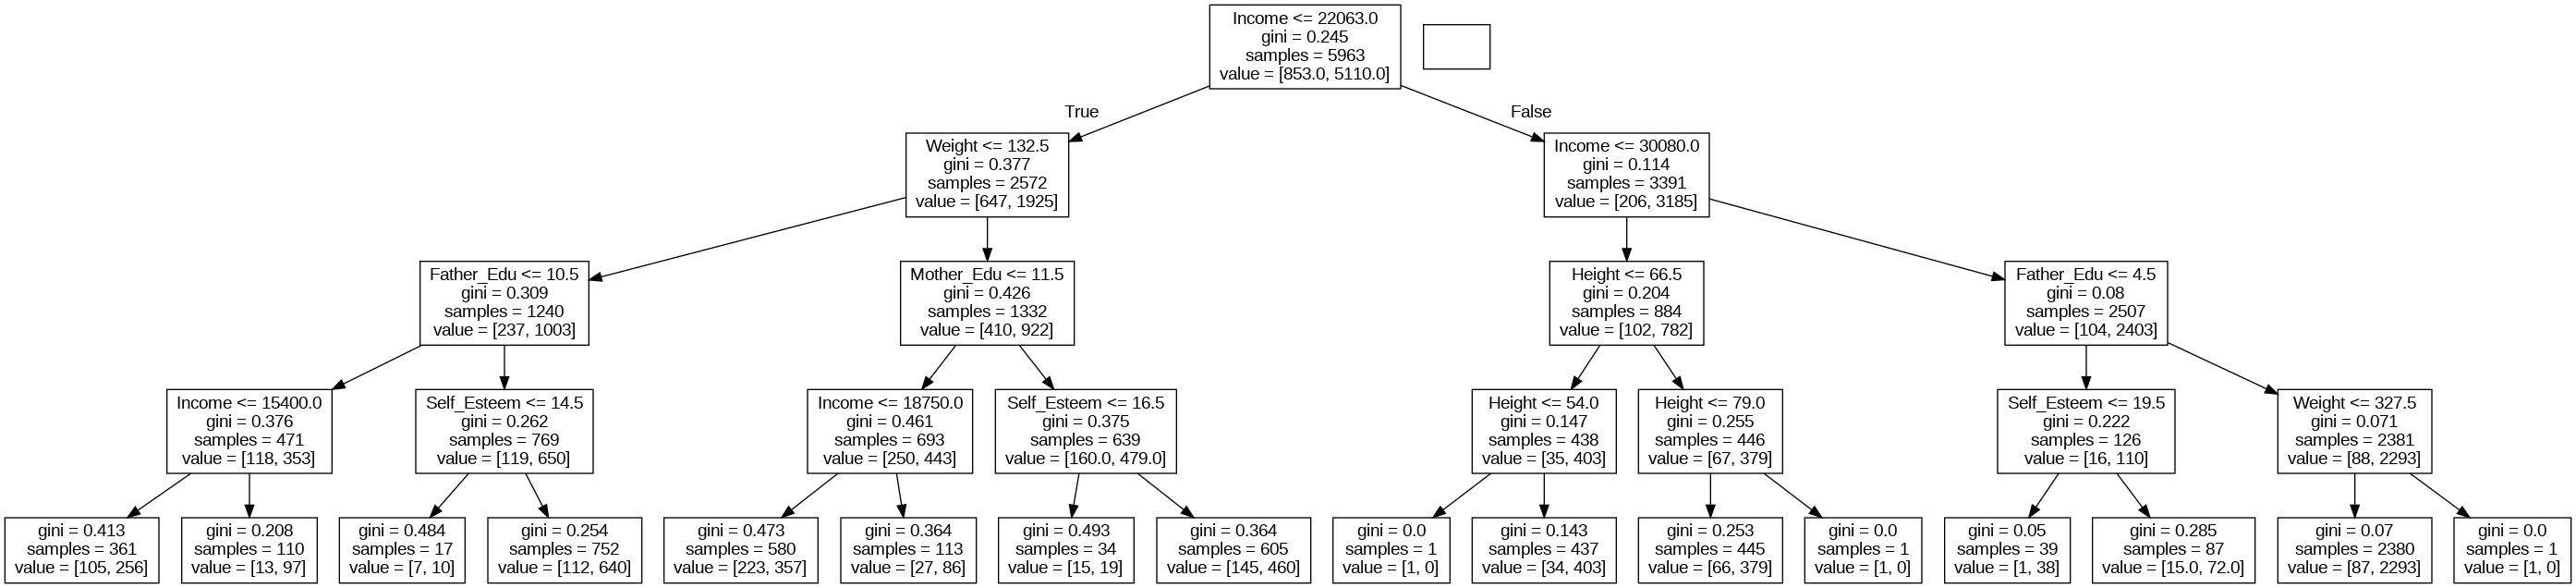

In [ ]:
si_salud= XDB['HealthPlan'].sum() #Sumamos valores que en columna 'HealthPlan' tengan el numero 1
no_salud= (XDB['HealthPlan'] == 0).sum() #Sumamos valores que en columna 'HealthPlan' tengan el numero 0
total= len(XDB)

#Imprimimos los resultados
print("Personas Con plan de salud:", si_salud)
print("Personas Sin plan de salud",no_salud)
print("Total de personas :", total)

Personas Con plan de salud: 5110.0
Personas Sin plan de salud 853
Total de personas : 5963


In [ ]:
prediccionp = [[18, 12, 12, 5, 28, 71, 180, 48000]]
mar.predict(prediccionp)
#esta persona tiene health plan (1)

#probabilidad de que la persona con 18,12,12,5,28,71,180,48000 pertenezca a cada una de las categorias de Health Plan
mar.predict_proba(prediccionp)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.03655462, 0.96344538]])

**Regla del negocio de [18,12,12,5,28,71,180,48000]:**

Income >=22063 , Income >=30080 , Father Edu >= 4.5, and Weight <= 327.5.

Gini0.07 samples 2380 - value (87,2293)
2380/2293 = Probability 96%

In [ ]:
#Se crea la matriz de confusión
ydp=mar.predict(XD)
cm=confusion_matrix(YD, ydp)
print(cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]
print("VN:", VN)
print("FP:", FP)
print("FN:", FN)
print("VP:", VP)

Ex= (VN+VP)/(VN+FP+FN+VP)
print("La exactitud del modelo es:", Ex)

Te= (FN+FP)/(VN+FP+FN+VP)
print("La tasa de error es:", Te)

Sen=VP/(VP+FN)
print("La sensibilidad del modelo es:", Sen)

Esp=VN/(VN+FP)
print("La especificidad del modelo es:", Esp)
pre=VP/(VP+FP)
print("La precisión del modelo es:", pre)
pren=VN/(VN+FN)
print("La precisión negativa del modelo es:", pren)
print("Total de excatitud y tasa de error:", Ex+Te)

[[   3  850]
 [   0 5110]]
VN: 3
FP: 850
FN: 0
VP: 5110
La exactitud del modelo es: 0.8574543015260775
La tasa de error es: 0.1425456984739225
La sensibilidad del modelo es: 1.0
La especificidad del modelo es: 0.0035169988276670576
La precisión del modelo es: 0.8573825503355704
La precisión negativa del modelo es: 1.0
Total de excatitud y tasa de error: 1.0


**Análisis de resultados 2**

Hay un total de 5963 personas evaluadas, 5110 cuentan con plan de salud, y 853 no tienen plan de salud.

Hay 3 verdaderos negativos, 850 falsos positivos, 0 falsos negativos y 5110 verdaderos positivos. Lo que indica un muy buen desempeño del modelo.
Esto lo podemos comprobar evaluando el desempeño del modelo, Detecta 100% de los casos positivos, lo cual es útil si el objetivo es no perder a ninguna persona con plan de salud. Tiene una precisión decente para los casos positivos (85.73%).

Lo malo:El modelo prácticamente no identifica a quienes NO tienen plan de salud (solo 3 aciertos en VN). Genera muchos falsos positivos (850), lo que significa que muchas personas sin plan de salud serán clasificadas erróneamente como si lo tuvieran. La especificidad es pésima (0.35%), lo que indica un gran sesgo hacia la clase positiva.

Podemos ver que el arbol lanzó 3 nodos puros, los cuales representan las reglas del negocio. y son las siguientes:
1. Income >=22063, income <=30080, height <=66.5, height <=54
2. Income >=22063, income >=30080, height >=66.5, height <= 79
3. Income >=22063, income >=30080, Father education <= 4.5, Weight <= 327.5





#####APLICACIÓN MODELO KMEANS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Las librerias para el modelo son:
from sklearn.cluster import KMeans #metodo de clusterizacion k mean
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB #la funcion exponencial de VP=Exp (-1/2((x-4)/devisacion estandar)^2) que necesitamos es una funcion gausiana, por eso lo importamos.
from sklearn.tree import DecisionTreeClassifier #Para crear el arbol de decisión


data = '/content/4. BD1_Longitudinal Survey_L_Int.xlsx'

XDBB = pd.read_excel(data, sheet_name=0) #XDB=XDATABASE
#PARA EJECUTAR SOLO UNA PARTE DEL CODIGO, SELECCIONAR EL NOMBRE DE LA VARIABLE Y PRESIONAR Ctrl + Shift + Enter
#XDB ES SOLO LA TABLA DE EXCEL


#Seleccionamos las variables de trabajo
XDB=XDBB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'HealthPlan', 'Income']]
XDB.dropna(inplace=True)

XD = XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']] #Vector donde invocamos variables que necesitamos

YD = XDB[['HealthPlan']] #Vector de variable a analizar

<ipython-input-90-9d3ab3ae4522>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB.dropna(inplace=True)


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


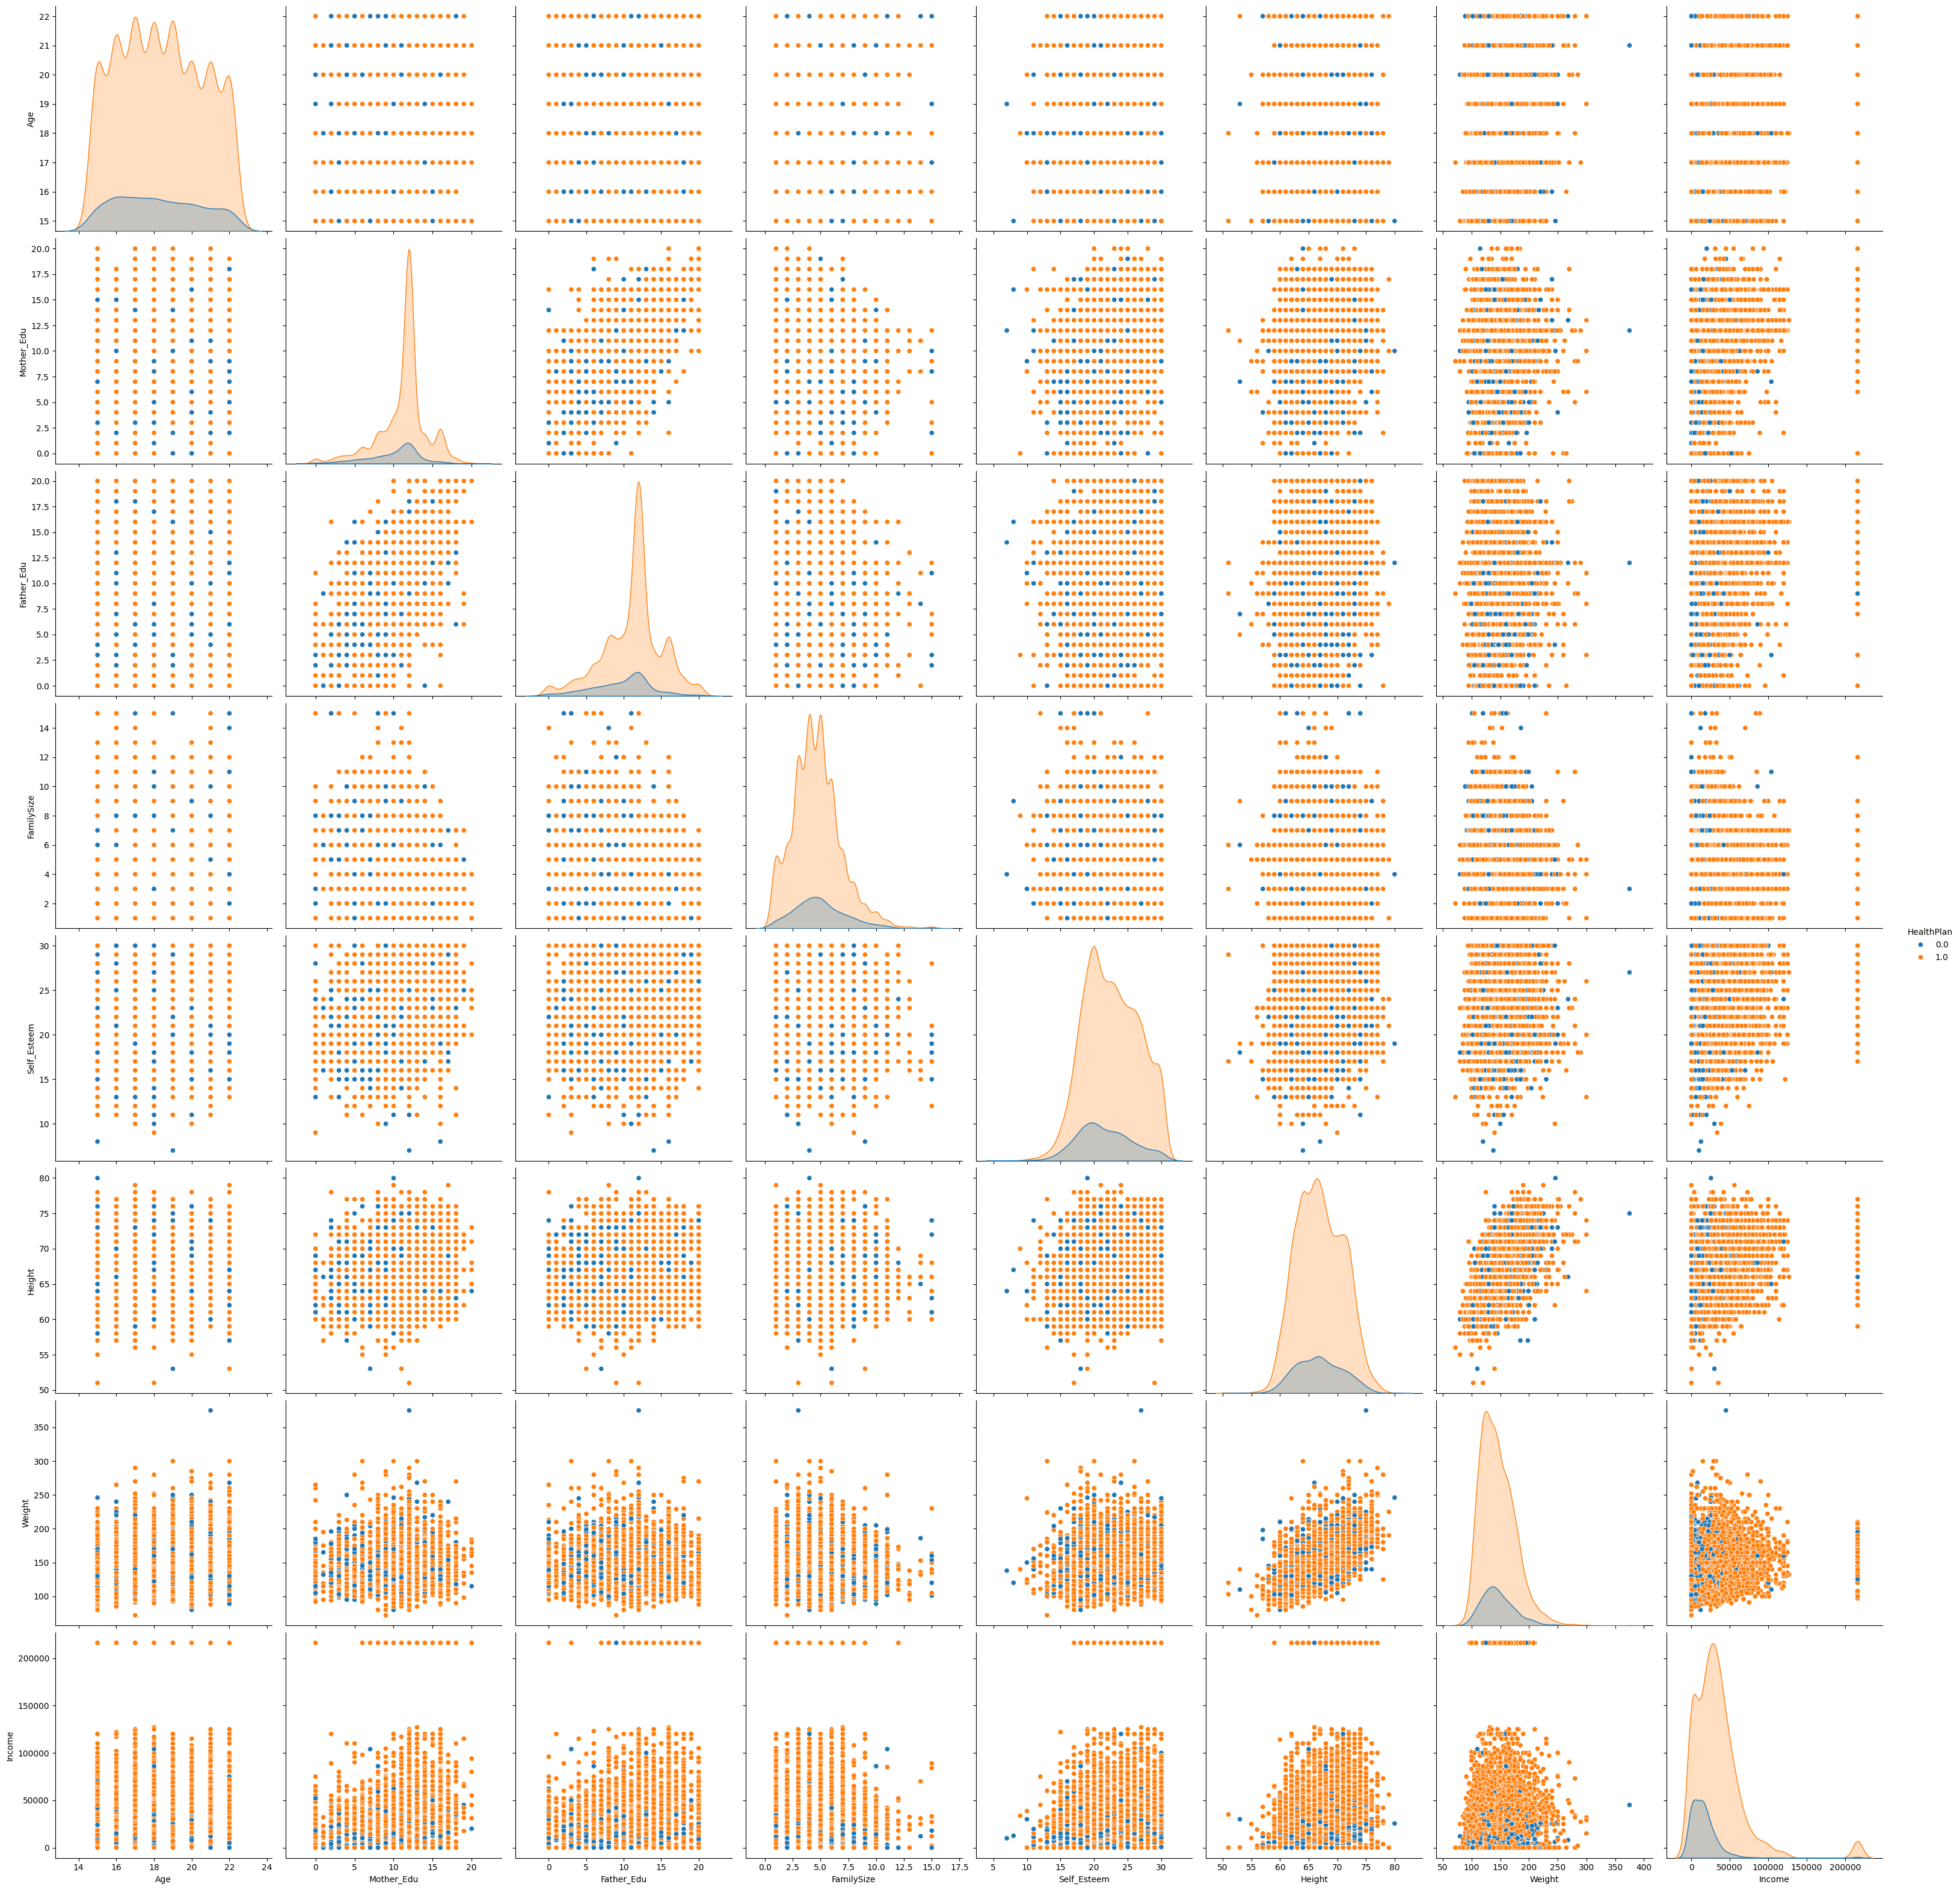

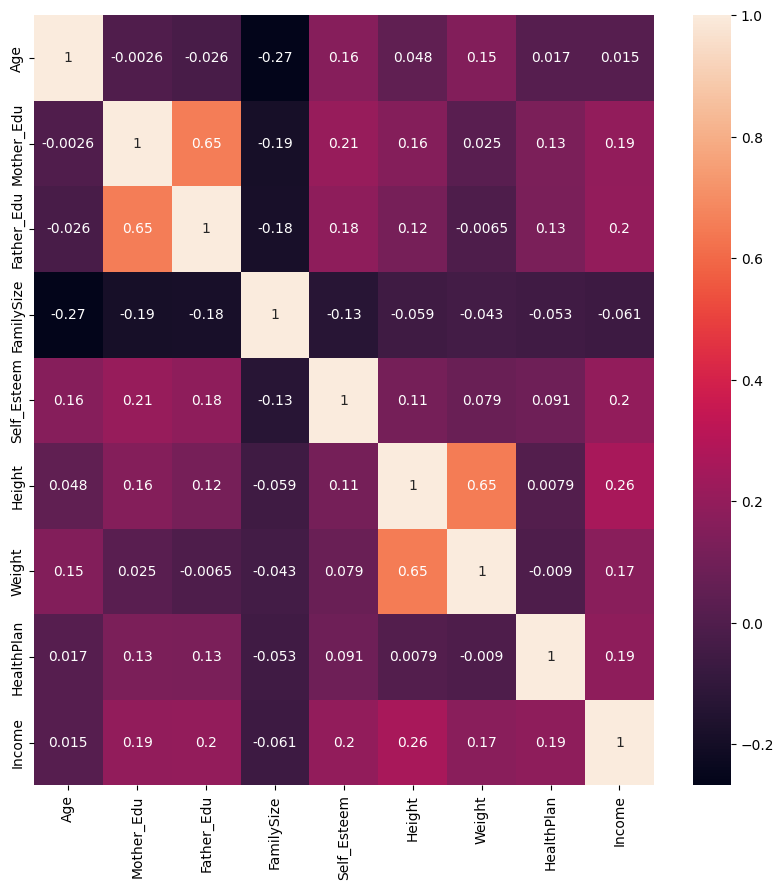

In [ ]:
#Construir gráficos de correlación
import seaborn as sns
sns.pairplot(XDB, hue='HealthPlan', size=4, vars=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income'])
plt.show()

#Crear un heat map
plt.figure(figsize=(10,10))
sns.heatmap(XDB.corr(), annot=True)
plt.show()

In [ ]:
np.random.seed(42) #Se generan los mismos numeros aleatorios
NC=5 #Numero de cluster NC=5, este se divide en muy bajo, bajo, medio, alto, muy alto
mkm=KMeans(n_clusters=NC, init='random', random_state=42)
mkm.fit(XD)

#Cuales son los graficos creados
dfc= pd.DataFrame(mkm.cluster_centers_) #Este arrojó 5 clusters
dfc.columns=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']
display(dfc)

Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem     Height  \
0  18.352564   11.695869   11.824074    4.502137    23.308405  68.292023   
1  18.383361   10.591343   10.383924    4.854413    21.549185  65.676785   
2  18.632479   13.256410   13.752137    4.324786    24.897436  69.692308   
3  18.340949   10.703866   10.568541    4.750439    22.212214  66.659051   
4  18.348837   12.547804   13.000000    4.426357    24.170543  69.198966   

       Weight         Income  
0  152.443732   49125.363248  
1  139.277122    4246.270377  
2  160.435897  216200.000000  
3  144.007030   25652.303603  
4  155.121447   88203.589147

Los cluster a los que pertenece una persona son:
 [1 0 3 ... 0 0 3]
[[1.83525641e+01 1.16958689e+01 1.18240741e+01 4.50213675e+00
  2.33084046e+01 6.82920228e+01 1.52443732e+02 4.91253632e+04]
 [1.83833614e+01 1.05913435e+01 1.03839236e+01 4.85441259e+00
  2.15491849e+01 6.56767847e+01 1.39277122e+02 4.24627038e+03]
 [1.86324786e+01 1.32564103e+01 1.37521368e+01 4.32478632e+00
  2.48974359e+01 6.96923077e+01 1.60435897e+02 2.16200000e+05]
 [1.83409490e+01 1.07038664e+01 1.05685413e+01 4.75043937e+00
  2.22122144e+01 6.66590510e+01 1.44007030e+02 2.56523036e+04]
 [1.83488372e+01 1.25478036e+01 1.30000000e+01 4.42635659e+00
  2.41705426e+01 6.91989664e+01 1.55121447e+02 8.82035891e+04]]


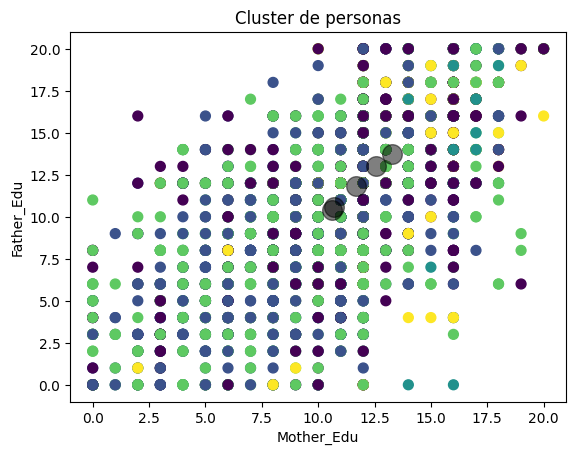

In [ ]:
#A que sucursalo cluster pertenece una persona
ydc=mkm.predict(XD)
print("Los cluster a los que pertenece una persona son:\n", ydc)

#Se procede con la gráfica de los cluster
centroids=mkm.cluster_centers_
print(centroids)
plt.figure()
plt.scatter(XD.iloc[:, 1], XD.iloc[:, 2], c=ydc, s=50, cmap='viridis')
plt.scatter(centroids[:,1], centroids[:,2], c='black', s=200, alpha=0.5)
plt.title('Cluster de personas')
plt.xlabel('Mother_Edu')
plt.ylabel('Father_Edu')
plt.show()

variables que tienen una mayor correlación con respecto a la variable de salida: Mother education and father education. y Height and weight

In [ ]:
ND=np.bincount(ydc)
XDB['Cluster']=ydc #le adiciona una columna a la tablita inicial de datos
display(XDB)

NTC=XDB.groupby('Cluster').agg({'HealthPlan':lambda x: (x==1).sum()})
print("El numero de personas con plan de salud por categoria es: ", NTC)
NTCP=np.array(NTC)/ND[:, None]
print("El porcentaje de personas con plan de salud por categoria es: ", NTCP)

NNTC=XDB.groupby('Cluster').agg({'HealthPlan':lambda x: (x==0).sum()})
print("El numero de personas sin plan de salud por categoria es: ", NNTC)
NNTCP=np.array(NNTC)/ND[:, None]
print("El porcentaje de personas sin plan de salud por categoria es: ", NNTCP)

df2=pd.DataFrame(np.column_stack((ND, NTC, NNTC, NTCP, NNTCP)))
df2.columns=('ND', 'NTC', 'NNTC', '%NTCP', '%NNTCP')
display(df2)

<ipython-input-94-d7c0c7fa5137>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB['Cluster']=ydc #le adiciona una columna a la tablita inicial de datos


Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem  Height  Weight  \
1       20         5.0         8.0           5         16.0    62.0   120.0   
5       19        12.0        12.0           4         27.0    64.0   200.0   
6       15        12.0        12.0           3         26.0    65.0   131.0   
7       21         9.0         6.0           3         23.0    65.0   179.0   
8       16        12.0        10.0           6         26.0    66.0   145.0   
...    ...         ...         ...         ...          ...     ...     ...   
12557   20        12.0        12.0           5         20.0    60.0   110.0   
12565   20        12.0        11.0           2         24.0    63.0   152.0   
12647   21        16.0        12.0           1         30.0    70.0   180.0   
12651   21        16.0        16.0           1         27.0    73.0   170.0   
12678   21         8.0         8.0           1         19.0    70.0   180.0   

       HealthPlan   Income  Cluster  
1             1.0      0.0        1  
5             1.0  40000.0        0  
6             1.0  25000.0        3  
7             1.0  27400.0        3  
8             1.0  52000.0        0  
...           ...      ...      ...  
12557         1.0   1000.0        1  
12565         1.0  38000.0        0  
12647         1.0  43600.0        0  
12651         1.0  40000.0        0  
12678         1.0  17000.0        3  

[5963 rows x 10 columns]

El numero de personas con plan de salud por categoria es:           HealthPlan
Cluster            
0              1353
1              1320
2               112
3              1947
4               378
El porcentaje de personas con plan de salud por categoria es:  [[0.96367521]
 [0.74198988]
 [0.95726496]
 [0.85544815]
 [0.97674419]]
El numero de personas sin plan de salud por categoria es:           HealthPlan
Cluster            
0                51
1               459
2                 5
3               329
4                 9
El porcentaje de personas sin plan de salud por categoria es:  [[0.03632479]
 [0.25801012]
 [0.04273504]
 [0.14455185]
 [0.02325581]]


ND     NTC   NNTC     %NTCP    %NNTCP
0  1404.0  1353.0   51.0  0.963675  0.036325
1  1779.0  1320.0  459.0  0.741990  0.258010
2   117.0   112.0    5.0  0.957265  0.042735
3  2276.0  1947.0  329.0  0.855448  0.144552
4   387.0   378.0    9.0  0.976744  0.023256

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


La persona pertenece al cluster: [0]
El porcentaje de Apr es [[0.96367521]]
El porcentaje de Neg es [[0.03632479]]


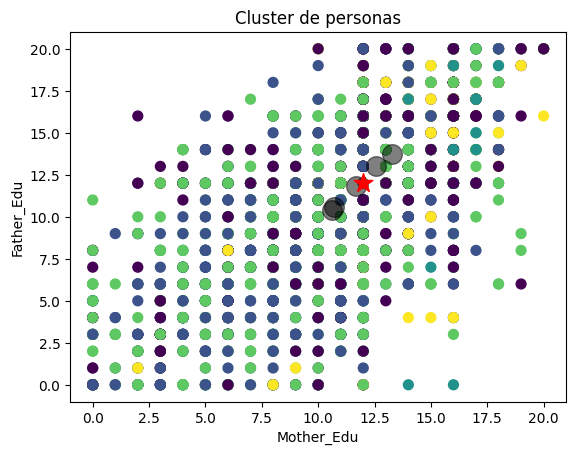

In [ ]:
XDN=np.array([18,12,12,5,28,71,180,48000])
ydn=mkm.predict(XDN.reshape(1,-1))
print('La persona pertenece al cluster:', ydn)
print('El porcentaje de Apr es', NTCP[ydn])
print('El porcentaje de Neg es', NNTCP[ydn])


plt.figure()
plt.scatter(XD.iloc[:, 1], XD.iloc[:, 2], c=ydc, s=50, cmap='viridis') # Use .iloc[] for integer-location based indexing
plt.scatter(centroids[:,1], centroids[:,2], c='black', s=200, alpha=0.5)
plt.scatter(XDN[1], XDN[2], marker='*', s=200, c='red')
plt.title('Cluster de personas')
plt.xlabel('Mother_Edu')
plt.ylabel('Father_Edu')
plt.show()

In [ ]:
ydp=np.zeros((len(ydc), 1))

for k in range (len(ydp)):
  print('La persona:', k)
  print('pertenece al cluster', ydc[k])
  ncl = ydc[k]  #Esto es para almacenar el numero de cluster
  print('El porcentaje de negación es:', NNTCP[ncl]) #Busca porcentaje de negación
  print('El porcentaje de aprobación es:', NTCP[ncl]) #Busca porcentaje de aprobación

  if NTCP[ncl]>NNTCP[ncl]:
    print("Tiene plan de salud")
    ydp[k]=1
  else:
    print("No tiene plan de salud")
    ydp[k]=0

XDB['Pronostico']=ydp #adiciono columna a la tabla original
display (XDB)
XDB.to_excel('InformeClusterParcial.xlsx')

Se truncaron las últimas líneas 5000 del resultado de transmisión.
La persona: 4963
pertenece al cluster 3
El porcentaje de negación es: [0.14455185]
El porcentaje de aprobación es: [0.85544815]
Tiene plan de salud
La persona: 4964
pertenece al cluster 0
El porcentaje de negación es: [0.03632479]
El porcentaje de aprobación es: [0.96367521]
Tiene plan de salud
La persona: 4965
pertenece al cluster 1
El porcentaje de negación es: [0.25801012]
El porcentaje de aprobación es: [0.74198988]
Tiene plan de salud
La persona: 4966
pertenece al cluster 1
El porcentaje de negación es: [0.25801012]
El porcentaje de aprobación es: [0.74198988]
Tiene plan de salud
La persona: 4967
pertenece al cluster 0
El porcentaje de negación es: [0.03632479]
El porcentaje de aprobación es: [0.96367521]
Tiene plan de salud
La persona: 4968
pertenece al cluster 3
El porcentaje de negación es: [0.14455185]
El porcentaje de aprobación es: [0.85544815]
Tiene plan de salud
La persona: 4969
pertenece al cluster 0
El po

<ipython-input-96-7569d435bf6c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB['Pronostico']=ydp #adiciono columna a la tabla original


Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem  Height  Weight  \
1       20         5.0         8.0           5         16.0    62.0   120.0   
5       19        12.0        12.0           4         27.0    64.0   200.0   
6       15        12.0        12.0           3         26.0    65.0   131.0   
7       21         9.0         6.0           3         23.0    65.0   179.0   
8       16        12.0        10.0           6         26.0    66.0   145.0   
...    ...         ...         ...         ...          ...     ...     ...   
12557   20        12.0        12.0           5         20.0    60.0   110.0   
12565   20        12.0        11.0           2         24.0    63.0   152.0   
12647   21        16.0        12.0           1         30.0    70.0   180.0   
12651   21        16.0        16.0           1         27.0    73.0   170.0   
12678   21         8.0         8.0           1         19.0    70.0   180.0   

       HealthPlan   Income  Cluster  Pronostico  
1             1.0      0.0        1         1.0  
5             1.0  40000.0        0         1.0  
6             1.0  25000.0        3         1.0  
7             1.0  27400.0        3         1.0  
8             1.0  52000.0        0         1.0  
...           ...      ...      ...         ...  
12557         1.0   1000.0        1         1.0  
12565         1.0  38000.0        0         1.0  
12647         1.0  43600.0        0         1.0  
12651         1.0  40000.0        0         1.0  
12678         1.0  17000.0        3         1.0  

[5963 rows x 11 columns]

In [ ]:
#Se crea la matriz de confusión
#evaluar el modelo co matriz de confusion
cm = confusion_matrix(YD, ydp)
print("Matriz de confusion: \n", cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Ex= (VN+VP)/(VN+FP+FN+VP)
print("La exactitud del modelo es:", Ex)

Te= (FN+FP)/(VN+FP+FN+VP)
print("La tasa de error es:", Te)

Sen=VP/(VP+FN)
print("La sensibilidad del modelo es:", Sen)

Esp=VN/(VN+FP)
print("La especificidad del modelo es:", Esp)
pre=VP/(VP+FP)
print("La precisión del modelo es:", pre)

pren=VN/(VN+FN)
print("La precisión negativa del modelo es:", pren)

print("Total de excatitud y tasa de error:", Ex+Te)

Matriz de confusion: 
 [[   0  853]
 [   0 5110]]
La exactitud del modelo es: 0.8569511990608754
La tasa de error es: 0.14304880093912462
La sensibilidad del modelo es: 1.0
La especificidad del modelo es: 0.0
La precisión del modelo es: 0.8569511990608754
La precisión negativa del modelo es: nan
Total de excatitud y tasa de error: 1.0


<ipython-input-97-187e0bff99ac>:25: RuntimeWarning: invalid value encountered in scalar divide
  pren=VN/(VN+FN)


**Análisis de resultados 3**

Las variables de entrada que presentan más correlacion con la variable de salida son mother education/Father education y Height/weight.

Nos damos cuentas que tenemos 5963 datos y los que cuentan con plan de salud por cada categoria son: 1353 pertenece al cluster 0 (96%) , 1320  pertenece al cluster 1 (74%) , 112 pertenece al cluster 2 (95%) , 1947 pertenece al cluster 3 (85.5%) y 378 pertenece al cluster 4 (97.7%).


Al evaluar el desempeño del modelo encontramos 0 verdaderos negativos. 853 falsos positivos, 0 falsos negativos y 5110 verdaderos postivos. LO que indica un desempeño bueno del modelo general.

Lo bueno: Identifica el 100% de las personas con plan de salud. Exactitud aceptable (~85%).

Lo malo: No clasifica correctamente a ninguna persona sin plan de salud.No puede calcular la precisión negativa porque nunca predice la clase negativa.

En otras palabras, el modelo está totalmente sesgado hacia la clase positiva (todas las personas tienen plan de salud según K-Means).


EXPLICACION DE LAS VARIABLES:

'Age' Corresponde a la edad de la persona, 'Mother_Edu' Corresponde a el nivel de educacion de la madre, 'Father_Edu' Corresponde al nivel de educacion del padre, 'FamilySize' Corresponde al numero de integrantes de la familia, 'Self_Esteem' Corresponde al nivel de autoestima de la persona, 'Height' Corresponde a la altura de la persona, 'Weight' Corresponde a el peso de la persona, 'Income' Corresponde al peso de la persona.



**Regla del negocio de [18,12,12,5,28,71,180,48000]:**

Income >=22063 , Income >=30080 , Father Edu >= 4.5, and Weight <= 327.5.

Gini0.07 samples 2380 - value (87,2293)
2380/2293 = Probability 96%

variables que tienen una mayor correlación con respecto a la variable de salida: Mother education and father education. y Height and weight

#COMPARACION DE TODOS LOS MODELOS

-Arbol de Decisión gana en Exactitud y Sensibilidad: Clasifica todos los casos positivos correctamente y tiene una tasa de error menor.

-Modelo Gaussiano tiene mejor Especificidad y Precisión: Identifica mejor a las personas sin plan de salud (aunque aún es baja).

-K-Means es el peor: No identifica ningún caso negativo (Especificidad = 0%), lo que lo hace inútil para este problema.

 El arbol de de decision parece ser el mejor ya que tiene Mejor exactitud (85.75%), predice todos los positivos correctamente (100% sensibilidad) y tiene una tasa de error más baja (14.25%).
